In [2]:
'''
list of bricks that I finished are in:
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/obiwan_analysis/preprocess/brickstat/dr8_10deg2/FinishedBricks.txt

dr8-obiwan catalogs of these bricks are in:
topdir+'/tractor/'+brickname[:3]+'/'+brickname+'/rs0/'+'tractor-'+brickname+'.fits'


for running dr8-obiwan
docker image on nersc is:driftingpig/obiwan_dr8:step11

my script for running obiwan is at:
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/dr8/

top level slurm running script is:
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/dr8/mpi4py_run_copy/slurm_all_bricks.sh

analysis notebook:
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/ipynb/dr8_10deg2.ipynb
'''

In [1]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/dr8_10deg2/'

In [2]:
import numpy as np
bricknames = np.loadtxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/obiwan_analysis/preprocess/brickstat/dr8_10deg2/FinishedBricks.txt'
                       ,dtype=np.str)

In [3]:
import astropy.io.fits as fits
tot_dat = None
tot_sims = None
for brickname in bricknames:
    dat = fits.getdata(topdir+'/tractor/'+brickname[:3]+'/'+brickname+'/rs0/'+'tractor-'+brickname+'.fits')
    sim = fits.getdata(topdir+'/obiwan/'+brickname[:3]+'/'+brickname+'/rs0/'+'simcat-elg-'+brickname+'.fits')
    if tot_dat is None:
        tot_dat = dat
        tot_sims = sim
    else:
        tot_dat = np.hstack((tot_dat,dat))
        tot_sims = np.hstack((tot_sims,sim))

In [4]:
from astropy.table import Column, Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [5]:
angle = 1.5/3600
c1 = SkyCoord(ra=tot_dat['ra']*u.degree, dec=tot_dat['dec']*u.degree)
c2 = SkyCoord(ra=tot_sims['ra']*u.degree, dec=tot_sims['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= angle
idx[~w] = -1 

In [6]:
import matplotlib.pyplot as plt
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
dat_m = tot_dat[idx1]
sim_m = tot_sims[idx2]

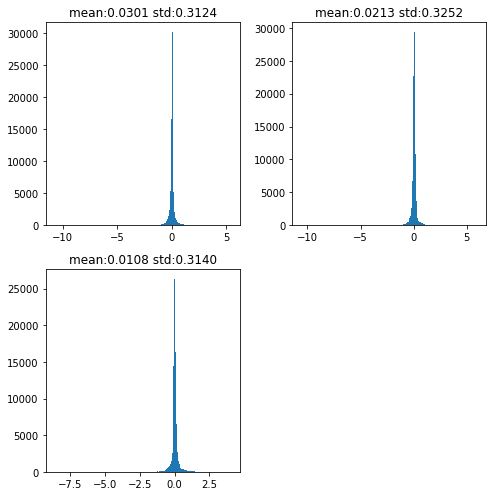

In [7]:
#g
plt.figure(figsize = (7,7))
sel = (dat_m['flux_g']>0)
g_dat  = 22.5 - 2.5 * np.log10(dat_m['flux_g'][sel] / dat_m['mw_transmission_g'][sel])
g_sim = 22.5 - 2.5 * np.log10(sim_m['gflux'][sel] / sim_m['mw_transmission_g'][sel])

plt.subplot(2,2,1)
plt.title('mean:%.4f std:%.4f'%((g_dat-g_sim).mean(),(g_dat-g_sim).std()))
p = plt.hist(g_dat-g_sim,bins = 200)
#r
sel = (dat_m['flux_r']>0)
r_dat  = 22.5 - 2.5 * np.log10(dat_m['flux_r'][sel] / dat_m['mw_transmission_r'][sel])
r_sim = 22.5 - 2.5 * np.log10(sim_m['rflux'][sel] / sim_m['mw_transmission_r'][sel])
plt.subplot(2,2,2)
plt.title('mean:%.4f std:%.4f'%((r_dat-r_sim).mean(),(r_dat-r_sim).std()))
p = plt.hist(r_dat-r_sim,bins = 200)
#z
sel = (dat_m['flux_z']>0)
z_dat  = 22.5 - 2.5 * np.log10(dat_m['flux_z'][sel] / dat_m['mw_transmission_z'][sel])
z_sim = 22.5 - 2.5 * np.log10(sim_m['zflux'][sel] / sim_m['mw_transmission_z'][sel])
plt.subplot(2,2,3)
plt.title('mean:%.4f std:%.4f'%((z_dat-z_sim).mean(),(z_dat-z_sim).std()))
p = plt.hist(z_dat-z_sim,bins = 200)

plt.tight_layout()